<h1><center>YanP_02</center></h1>


<h3 align="center">Oct 9, 2022</h3> 

0.1  Student: Yan, Puwentao (V00031753)
## 1 Problem 4

In [129]:
# installing basic python3 library
!pip freeze
!pip3 install numpy
!pip3 install pandas
!pip3 install sklearn
!pip3 install matplotlib
!pip3 install pydotplus
!pip3 install six

absl-py==1.2.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.3
aiosignal==1.2.0
alabaster==0.7.12
albumentations==1.2.1
altair==4.2.0
appdirs==1.4.4
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
asynctest==0.13.0
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.1.0
audioread==3.0.0
autograd==1.5
Babel==2.10.3
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.1
blis==0.7.8
bokeh==2.3.3
branca==0.5.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==4.2.4
catalogue==2.0.8
certifi==2022.9.24
cffi==1.15.1
cftime==1.6.2
chardet==3.0.4
charset-normalizer==2.1.1
click==7.1.2
clikit==0.6.2
cloudpickle==1.5.0
cmake==3.22.6
cmdstanpy==1.0.7
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.2
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.2.1
cycler==0.11.0
cymem==2.0.6
Cython==0.29.32
daft==0.0.4
dask==2022.2.0
datascience==0.17.5
debugpy==1.0.0
decorator==4.4.

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
from IPython.display import Image 
from six import StringIO
import pydotplus
np.random.seed(1337)

1.1 Implement ID3 (entropy-based) from scikit-learn

In [131]:
# import elections_clean.csv from google drive
url = 'https://drive.google.com/file/d/1wAKUvFUSTuh-0bdKjzi2rnA-gKXRqPhu/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [132]:
# convert categorical data to one-hot (1-of-k) encoding
catg_features = ['education', 'religion', 'ethnic_female', 'ethnic_male']
for feature in catg_features:
  df = pd.concat([df, pd.get_dummies(df[feature])], axis=1)
df = df.drop(columns = ['Unnamed: 0', 'education', 'religion', 'ethnic_female', 'ethnic_male', 'county', 'state']) # Here I dropped county and state because I didn't use them as categorical features in Problem 2.
df.columns = df.columns.str.replace(" ", "_").str.lower()

new_catg_features = list(df.columns)[-28:] # new_catg_features contains all converted categorical features
X_train, X_test, y_train, y_test = train_test_split(df[new_catg_features].values, df['democrat'].values, test_size=0.33, random_state=42)
# Define the classifier
id3_entropy = DecisionTreeClassifier(random_state=1, max_depth=7, criterion="entropy")
id3_entropy = id3_entropy.fit(df[new_catg_features].values, df['democrat'].values)
print("Prediction:",id3_entropy.predict([[0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0]])) # predict on row 3 "Chittenden County"
print("Targets -> 0: not democrat, 1: democrat")
id3_entropy

Prediction: [1]
Targets -> 0: not democrat, 1: democrat


DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=1)

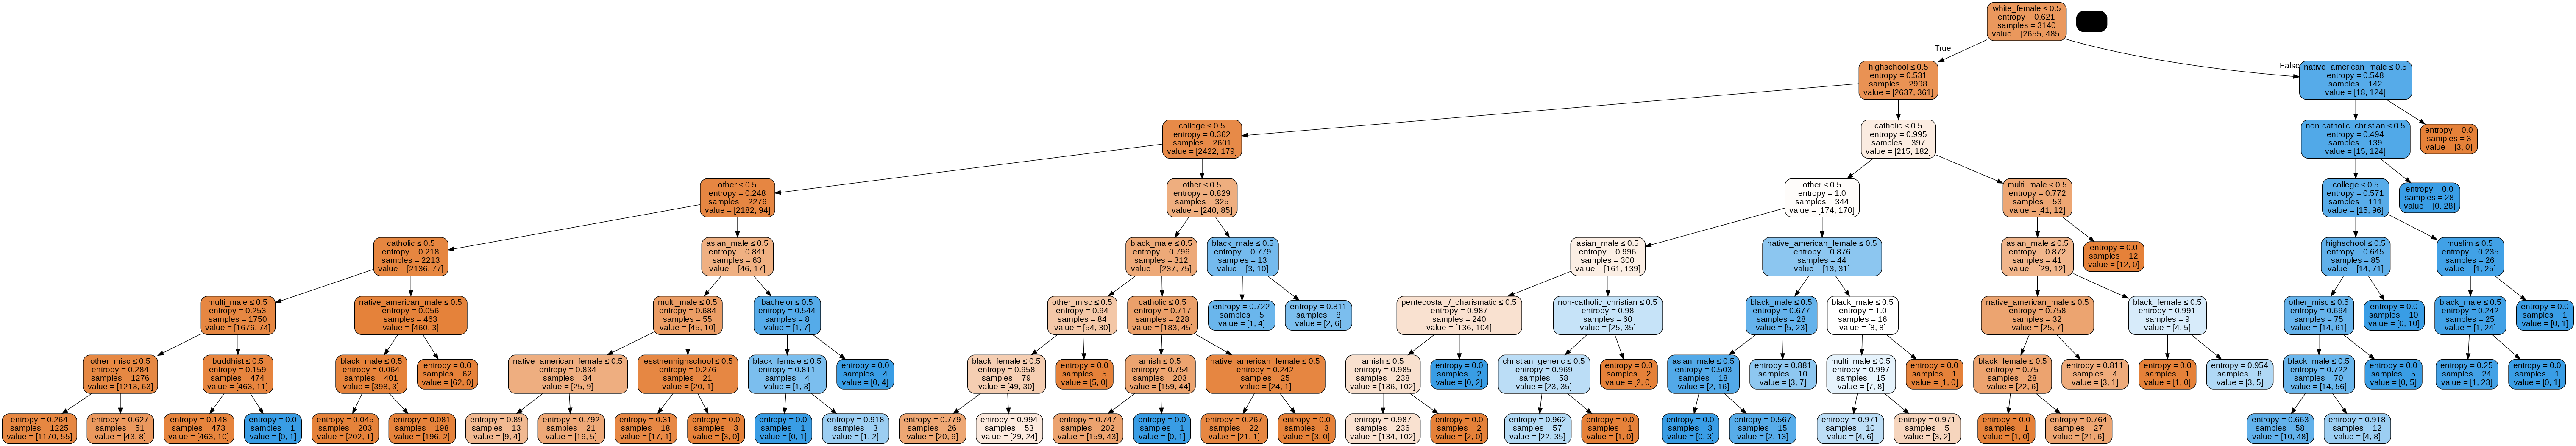

In [133]:
# graph the decision tree
dot_data = StringIO()
export_graphviz(id3_entropy, feature_names = new_catg_features, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [134]:
predictions = id3_entropy.predict(X_test)
print("Accuracy (%):",metrics.accuracy_score(y_test, predictions)*100,"%")
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, predictions))

Accuracy (%): 89.10318225650916 %
Confusion Matrix:
[[854  16]
 [ 97  70]]


1.2 Implement ID3 (gini coefficient-based) from scikit-learn

In [135]:
# Define the classifier
id3_gini = DecisionTreeClassifier(random_state=0, max_depth=7, criterion="gini")
id3_gini = id3_gini.fit(df[new_catg_features].values, df['democrat'].values)

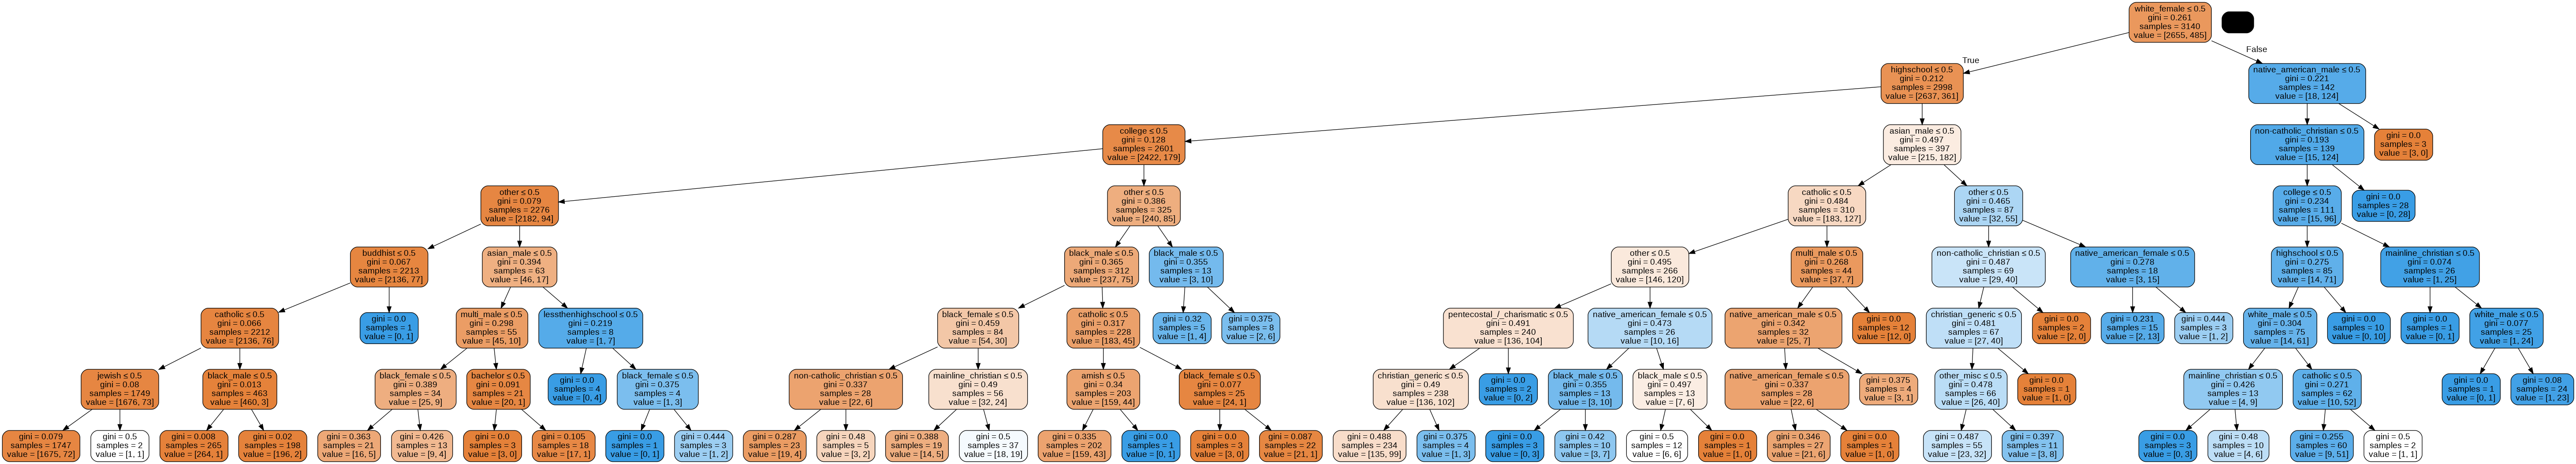

In [136]:
# graph the decision tree
dot_data = StringIO()
export_graphviz(id3_gini, feature_names = new_catg_features, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [137]:
predictions = id3_gini.predict(X_test)
print("Accuracy (%):",metrics.accuracy_score(y_test, predictions)*100,"%")
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, predictions))

Accuracy (%): 89.48891031822566 %
Confusion Matrix:
[[851  19]
 [ 90  77]]


Summary:

Comparing trees sklearn generated with trees I generated in Problem 2, they are very different. 

For example, trees I gengrated are not binary tree, but sklearn uses binary tree because sklearn can only support numerical features which is really hard to find a spliting rule.